In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')

In [3]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [4]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
DF['World without China'] = DF.World - DF.China
#DF.index.rename('Date', inplace = True)

In [5]:
# Countries = ['India', 'World', 'World without China',
#                       'US', 'Italy', 'Spain', 'China', 'Argentina',
#                       'UK', 'France', 'Brazil',
#                       'S.Korea', 'Iran', 'Belgium', 'New Zealand', 
#                        'Russia', 'Mexico']#[::-1]
colors = {'India': 'Blue', 
          'World': 'Blue', 
#           'World without China': 'Green', 
          'US': 'Black', 'China': 'red', 
          'Spain': 'yellow',
          'Italy': 'grey', 
          'Iran': 'brown', 
          'UK': 'Purple', 
          'S.Korea': 'lightgreen', 
          'France': 'violet', 
#           'Germany': 'lime', 
          'Argentina': 'Teal',
          'Russia': 'cyan', 
          'Mexico': 'Orange', 
          'Brazil': 'darkgreen', 
#           'Belgium': 'cyan',
          'New Zealand': 'lightblue'}

Countries = list(colors.keys())

In [6]:
def plotter(DF, name, scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [7]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [8]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [9]:
Deaths = DF.copy()

In [10]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-16,130519,1327007,246965,4742,41253,45733,41979,52240,494,45122,35727,33184,98861,166014,25
2020-11-17,130993,1338106,248672,4742,41688,46464,42461,52839,496,46346,36106,33619,99026,166699,25
2020-11-18,131578,1349380,250520,4742,42039,47217,42941,53368,498,46772,36347,34068,99528,167455,25
2020-11-19,132162,1360381,252535,4742,42291,47870,43417,53870,501,47201,36532,34525,100104,168061,25
2020-11-20,132726,1372182,254413,4742,42619,48569,43896,54381,503,48341,36790,34980,100823,168613,25


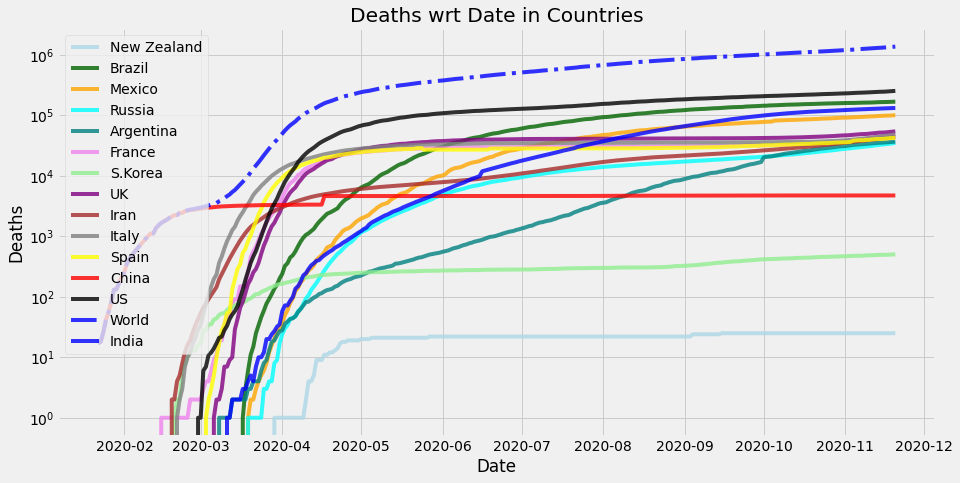

In [11]:
plotter(Deaths, 'Deaths')

In [12]:
Biweekly_Deaths = np.round((Deaths - Deaths.shift(14))/14, 2)
Biweekly_Deaths = Biweekly_Deaths.fillna(0)#.astype('int')
Biweekly_Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-16,530.14,8590.21,1064.21,0.21,356.86,476.71,445.79,378.36,1.57,545.50,293.14,351.43,482.93,411.50,0.0
2020-11-17,527.29,8779.29,1073.86,0.21,370.93,503.71,450.07,392.79,1.57,602.21,289.57,357.71,459.50,443.07,0.0
2020-11-18,518.79,8798.86,1129.21,0.14,280.07,532.36,454.43,395.43,1.64,574.57,273.36,362.29,450.00,453.50,0.0
2020-11-19,512.64,9008.93,1190.36,0.07,271.79,548.43,459.43,404.29,1.79,579.50,269.00,374.29,452.29,496.79,0.0
2020-11-20,511.71,9170.50,1243.79,0.07,270.43,566.50,463.36,415.43,1.86,601.79,261.00,380.43,464.29,471.29,0.0


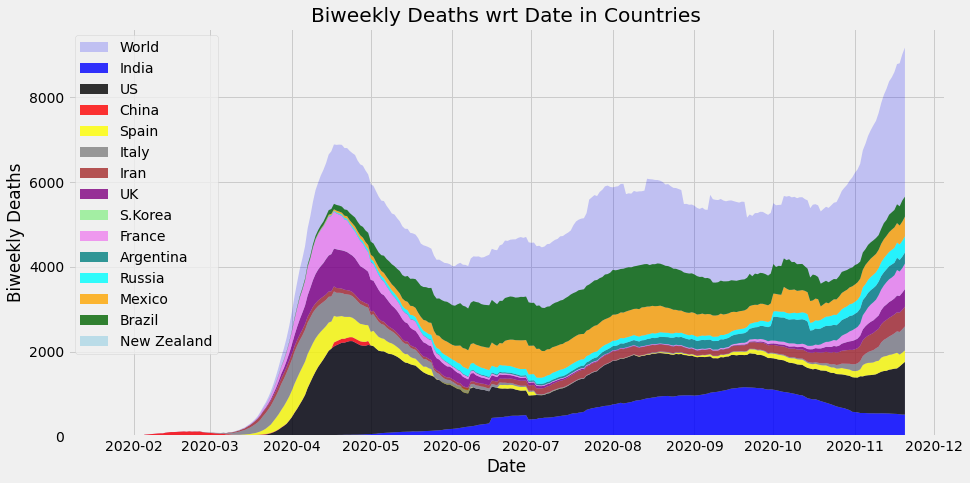

In [13]:
stackplotter(Biweekly_Deaths, 'Biweekly Deaths')

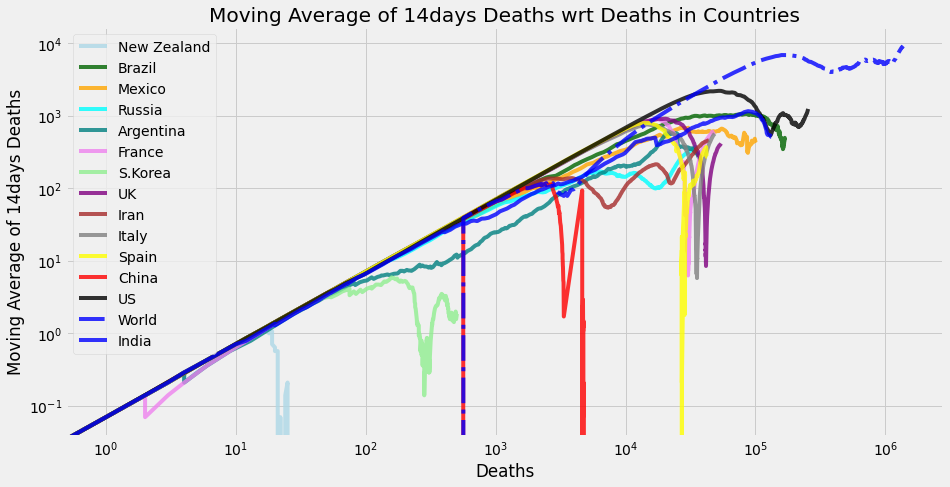

In [14]:
plotwrtDeaths(Biweekly_Deaths, 'Moving Average of 14days Deaths', Deaths)

In [15]:
Weekly_Deaths = np.round((Deaths - Deaths.shift(7))/7)
Weekly_Deaths = Weekly_Deaths.fillna(0).astype('int')
Weekly_Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-16,494,8970,1112,0,273,569,461,416,1,582,260,377,519,484,0
2020-11-17,489,9128,1156,0,335,591,466,425,1,582,275,389,455,557,0
2020-11-18,494,9250,1222,0,276,609,468,416,2,596,259,392,443,584,0
2020-11-19,499,9430,1335,0,261,612,471,407,2,597,250,396,435,540,0
2020-11-20,505,9754,1441,0,264,633,473,426,2,626,249,403,457,554,0


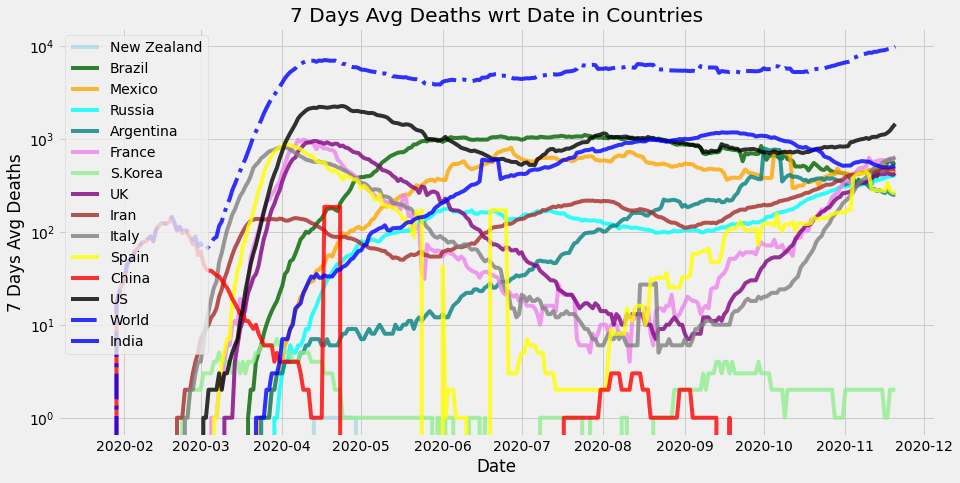

In [16]:
plotter(Weekly_Deaths, '7 Days Avg Deaths')

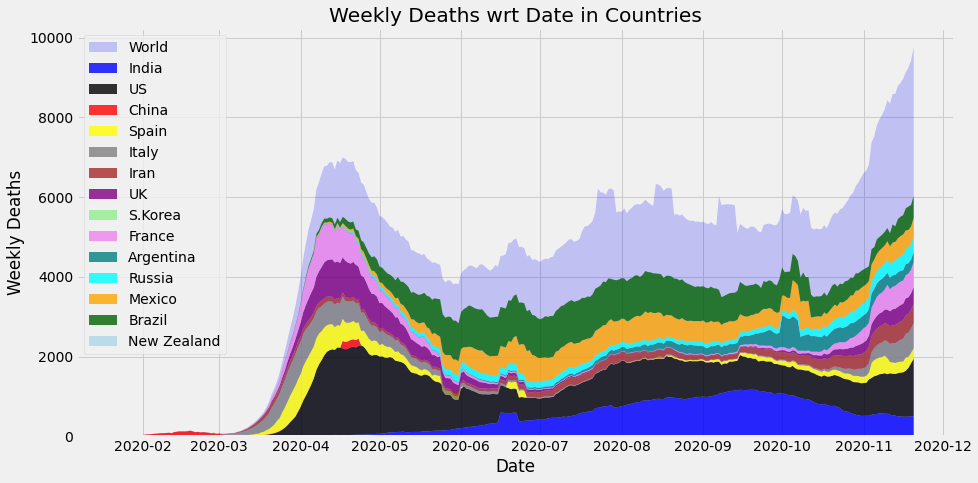

In [17]:
stackplotter(Weekly_Deaths, 'Weekly Deaths')

In [18]:
ThreeDaysDeaths = np.round((Deaths - Deaths.shift(3))/3)
ThreeDaysDeaths = ThreeDaysDeaths.fillna(0).astype('int')
ThreeDaysDeaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-16,444,7700,880,0,161,531,466,281,1,388,227,343,412,426,0
2020-11-17,453,8403,1027,0,306,594,476,327,1,678,266,361,256,347,0
2020-11-18,503,10079,1438,0,423,663,483,447,1,720,304,394,329,552,0
2020-11-19,548,11125,1857,0,346,712,479,543,2,693,268,447,414,682,0
2020-11-20,578,11359,1914,0,310,702,478,514,2,665,228,454,599,638,0


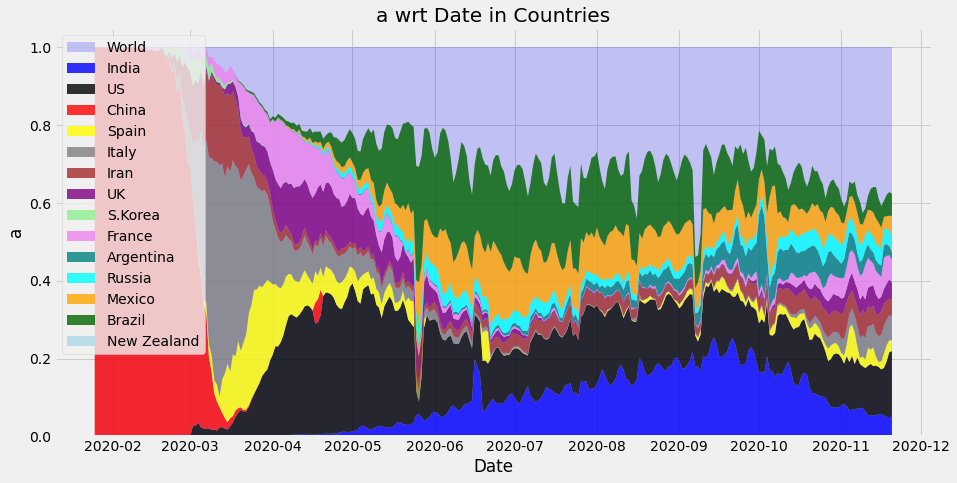

In [19]:
stackplotter(ThreeDaysDeaths.divide(ThreeDaysDeaths.World, axis=0),#.clip(upper=1.0, lower=0.0),
             'a')

In [20]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-16,449,7863,758,0,484,504,486,214,0,509,291,299,319,216,0
2020-11-17,474,11099,1707,0,435,731,482,599,2,1224,379,435,165,685,0
2020-11-18,585,11274,1848,0,351,753,480,529,2,426,241,449,502,756,0
2020-11-19,584,11001,2015,0,252,653,476,502,3,429,185,457,576,606,0
2020-11-20,564,11801,1878,0,328,699,479,511,2,1140,258,455,719,552,0


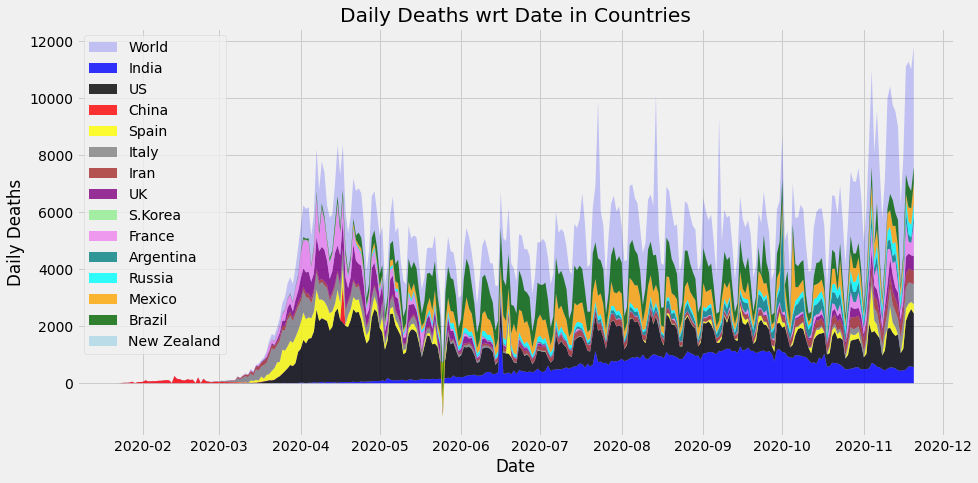

In [21]:
stackplotter(Daily_Deaths, 'Daily Deaths')

In [22]:
Reproductivity = np.round(Weekly_Deaths/Biweekly_Deaths.shift(7), 4)#.iloc[-1]
# Reproductivity = Reproductivity.fillna(1).clip(upper=10, lower=0.3)
Reproductivity[Countries].iloc[-1]

Country/Region
India          0.9368
World          1.1901
US             1.4315
China          0.0000
Spain          0.7557
Italy          1.5232
Iran           1.0849
UK             1.1747
S.Korea        1.0000
France         1.1921
Argentina      0.8196
Russia         1.2019
Mexico         1.0099
Brazil         1.4745
New Zealand       NaN
Name: 2020-11-20 00:00:00, dtype: float64

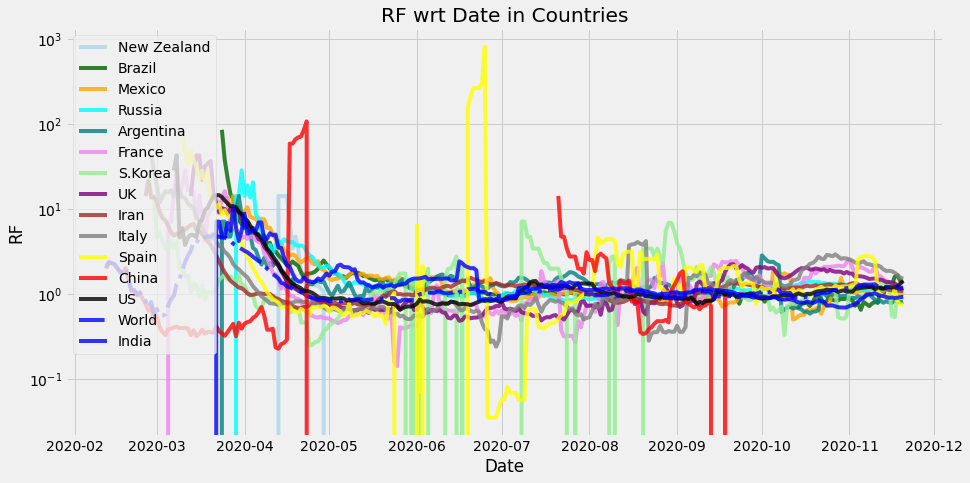

In [23]:
plotter(Reproductivity, 'RF')
pd.melt(Reproductivity).to_csv('CSVs/Reproductivity.csv')

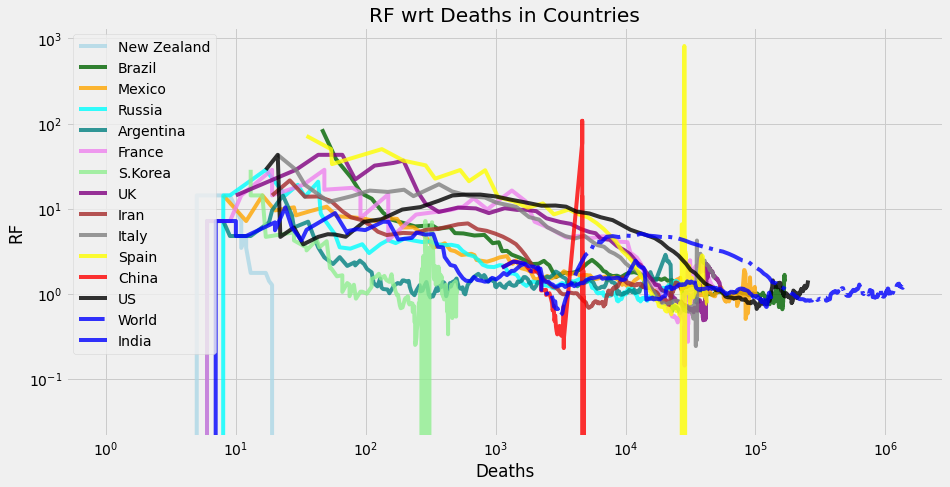

In [24]:
plotwrtDeaths(Reproductivity, 'RF', Deaths)

In [25]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [26]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Weekly Deaths': Weekly_Deaths,
    'Triday Deaths': ThreeDaysDeaths,
    'Daily Deaths':Daily_Deaths,
    'Reproductive Factor':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
# LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=4000]

In [27]:
Growth = np.round(Weekly_Deaths/Deaths, 4)
#Growth = Growth.fillna(0)
Growth[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-16,0.0038,0.0068,0.0045,0.0,0.0066,0.0124,0.0110,0.0080,0.002,0.0129,0.0073,0.0114,0.0052,0.0029,0.0
2020-11-17,0.0037,0.0068,0.0046,0.0,0.0080,0.0127,0.0110,0.0080,0.002,0.0126,0.0076,0.0116,0.0046,0.0033,0.0
2020-11-18,0.0038,0.0069,0.0049,0.0,0.0066,0.0129,0.0109,0.0078,0.004,0.0127,0.0071,0.0115,0.0045,0.0035,0.0
2020-11-19,0.0038,0.0069,0.0053,0.0,0.0062,0.0128,0.0108,0.0076,0.004,0.0126,0.0068,0.0115,0.0043,0.0032,0.0
2020-11-20,0.0038,0.0071,0.0057,0.0,0.0062,0.0130,0.0108,0.0078,0.004,0.0129,0.0068,0.0115,0.0045,0.0033,0.0


In [28]:
def days100(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]

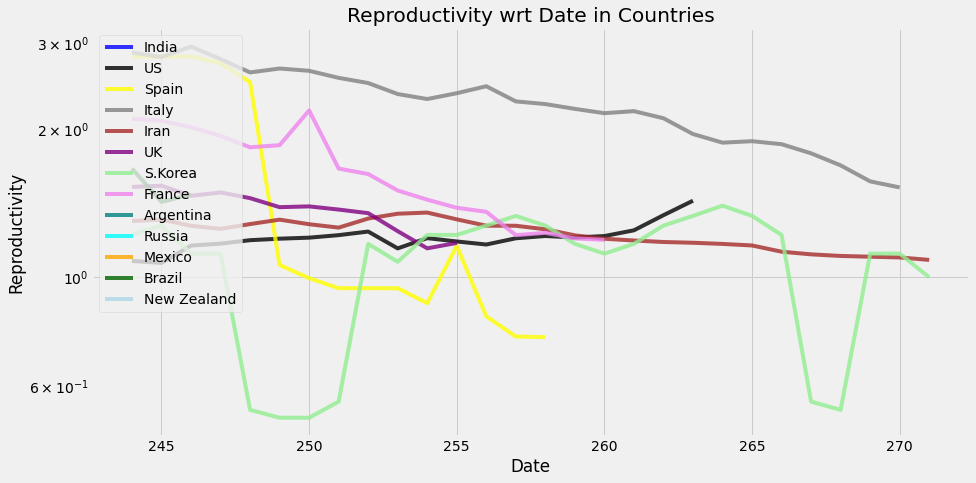

In [29]:
RF = days100(Reproductivity).tail(60)
plotter(RF[[cun for cun in Countries if cun not in ['China', 'World']]], 'Reproductivity', col = 'all')

In [30]:
LastDay_DF.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Vanuatu', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'World',
       'World without China'],
      dtype='object', name='Country', length=193)

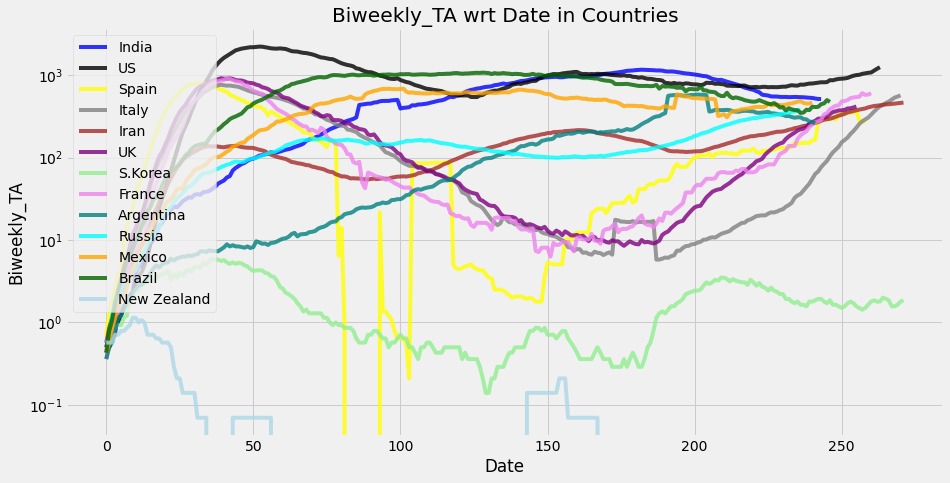

In [31]:
BD = days100(Biweekly_Deaths)
plotter(BD[[cun for cun in Countries if cun not in ['China', 'World']]], 'Biweekly_TA', col = 'all')

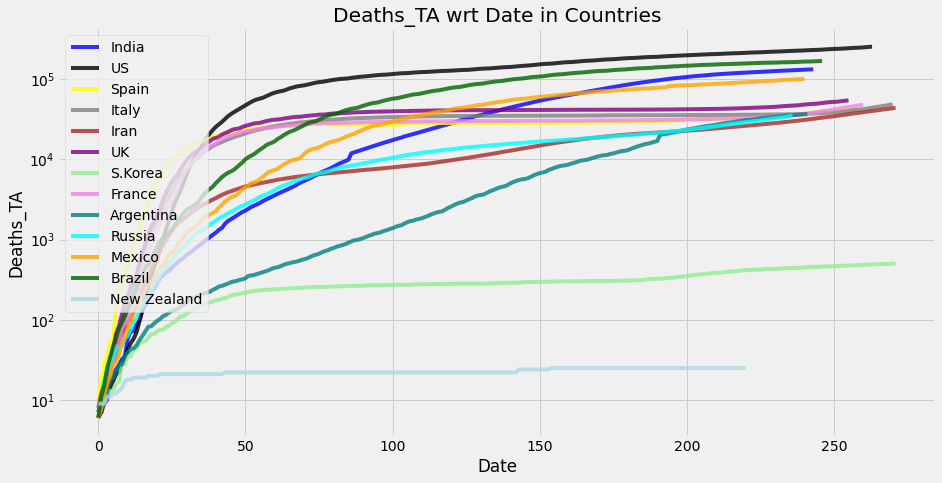

In [32]:
D = days100(Deaths)
plotter(D[[cun for cun in Countries if cun not in ['China', 'World']]], 'Deaths_TA', col = 'all')

In [33]:
def TA(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [0 for _ in range(len(X[col]) - len(L))]
    return X

In [34]:
def csvify(X, name):
    DF = X.copy()
    DF['Date'] = DF.index
    DF = pd.melt(DF, id_vars = 'Date')
    DF.to_csv(f'CSVs\\{name}.csv', index = False)

In [35]:
# for name, df in {'Deaths': Deaths, 
#            'BiweeklyDeaths': Biweekly_Deaths,
#            'Daily_Deaths': Daily_Deaths,
#            'Reproductivity': Reproductivity,
#           }.items():
#     csvify(df, name)
#     csvify(TA(df), 'TA_' + name)

In [36]:
LastDay_DF.sort_values('Deaths', ascending = False).head(10)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World,1372182,9170.50,9754,11359,11801,1.1901
World without China,1367440,9170.43,9754,11359,11801,1.1901
US,254413,1243.79,1441,1914,1878,1.4315
Brazil,168613,471.29,554,638,552,1.4745
India,132726,511.71,505,578,564,0.9368
Mexico,100823,464.29,457,599,719,1.0099
UK,54381,415.43,426,514,511,1.1747
Italy,48569,566.50,633,702,699,1.5232
France,48341,601.79,626,665,1140,1.1921


In [37]:
LastDay_DF.sort_values('Weekly Deaths', ascending = False).head(10)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World without China,1367440,9170.43,9754,11359,11801,1.1901
World,1372182,9170.50,9754,11359,11801,1.1901
US,254413,1243.79,1441,1914,1878,1.4315
Italy,48569,566.50,633,702,699,1.5232
France,48341,601.79,626,665,1140,1.1921
Brazil,168613,471.29,554,638,552,1.4745
India,132726,511.71,505,578,564,0.9368
Iran,43896,463.36,473,478,479,1.0849
Poland,12714,387.64,459,622,626,1.5492


In [38]:
LastDay_DF[(LastDay_DF['Reproductive Factor']>.8) & (LastDay_DF['Weekly Deaths']>200)]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Argentina,36790,261.00,249,228,258,0.8196
Brazil,168613,471.29,554,638,552,1.4745
France,48341,601.79,626,665,1140,1.1921
Germany,13918,191.29,216,260,256,1.5022
India,132726,511.71,505,578,564,0.9368
Iran,43896,463.36,473,478,479,1.0849
Italy,48569,566.50,633,702,699,1.5232
Mexico,100823,464.29,457,599,719,1.0099
Poland,12714,387.64,459,622,626,1.5492


In [39]:
LastDay_DF[(LastDay_DF['Weekly Deaths'] == 0) & (LastDay_DF.Deaths > 300)]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Australia,907,0.00,0,0,0,NaN
Cameroon,435,0.43,0,1,0,0.0
China,4742,0.07,0,0,0,0.0
Ghana,323,0.21,0,0,0,NaN
Nigeria,1165,0.71,0,1,0,0.0
Yemen,608,0.43,0,0,0,0.0


In [40]:
LastDay_DF[LastDay_DF['Weekly Deaths']> 200]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Argentina,36790,261.00,249,228,258,0.8196
Brazil,168613,471.29,554,638,552,1.4745
France,48341,601.79,626,665,1140,1.1921
Germany,13918,191.29,216,260,256,1.5022
India,132726,511.71,505,578,564,0.9368
Iran,43896,463.36,473,478,479,1.0849
Italy,48569,566.50,633,702,699,1.5232
Mexico,100823,464.29,457,599,719,1.0099
Poland,12714,387.64,459,622,626,1.5492


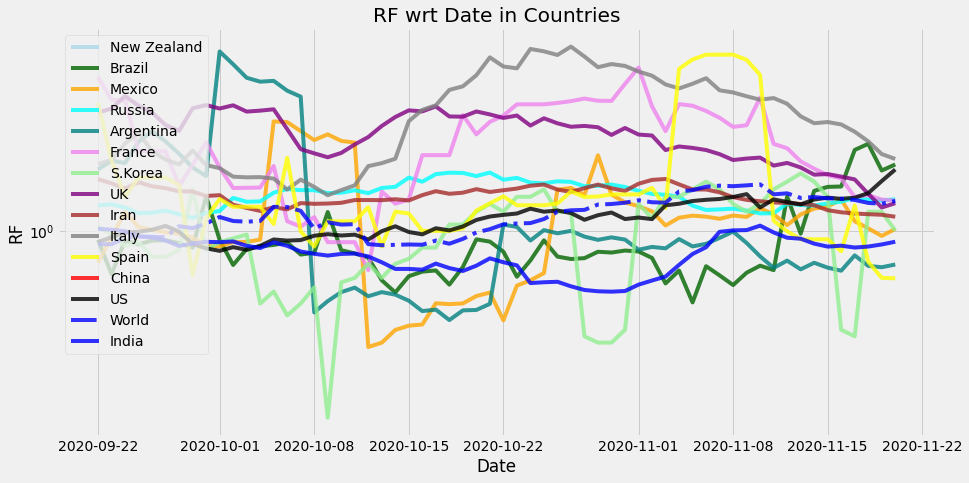

In [41]:
plotter(Reproductivity.tail(60), 'RF')

In [42]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[2:]
    deaths = DF[name][2:]
    
    print ('World: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World:  1372182


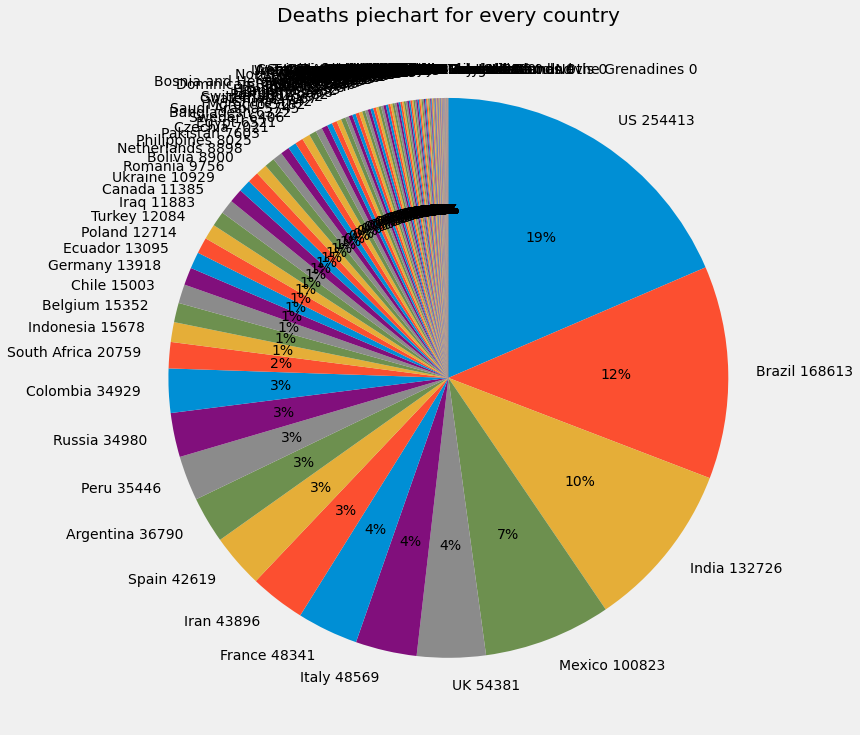

In [43]:
piechart()

World:  9754


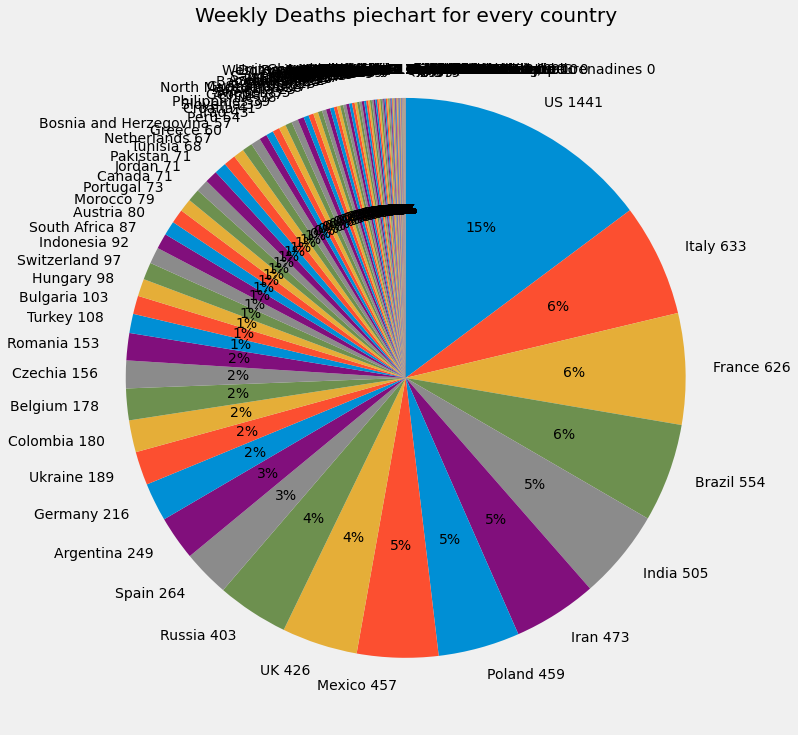

In [44]:
piechart('Weekly Deaths')

World:  11801


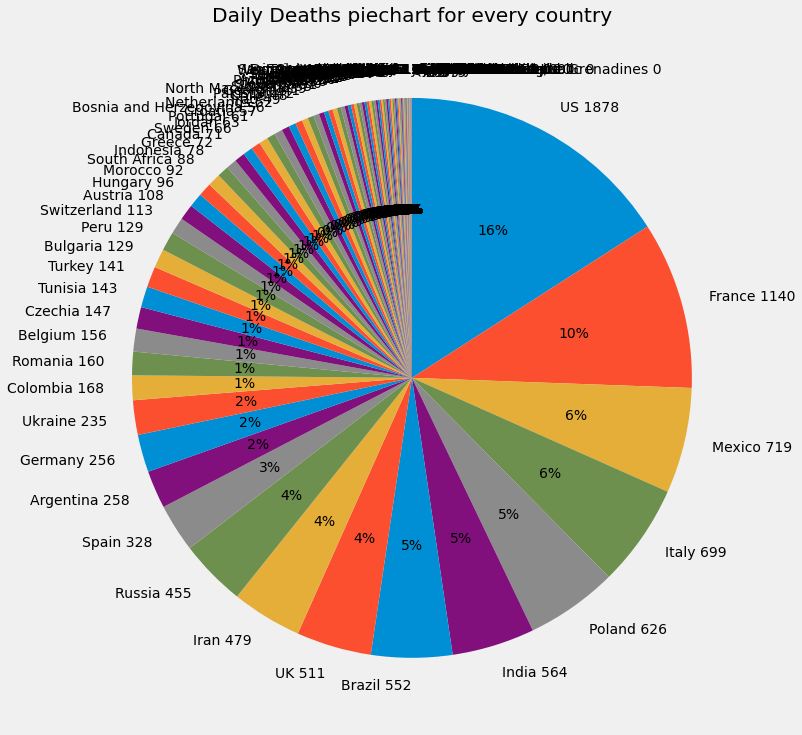

In [45]:
piechart('Daily Deaths')

In [48]:
dt.datetime.now().date()

datetime.date(2020, 11, 21)